In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import keras
import tensorflow as tf
import seaborn as sns
import joblib
from tensorflow import keras
from pylab import rcParams
from matplotlib import rc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense

## Plotly imports ############

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Plotly and cufflinks OFFLINE mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [2]:
import os

os.chdir("/Users/obadaessa/Desktop/Internship/Data Sets")

# Preprocessing

In [3]:
dataset = pd.read_csv('hospital_patients.csv')

In [4]:
dataset

,gender,age,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,glimepiride,glipizide,glyburide,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Female,[0-10),41,0,1,1,No,No,No,No,No,No,No,No,NO
1,Female,[10-20),59,0,18,9,No,No,No,No,No,Up,Ch,Yes,>30
2,Female,[20-30),11,5,13,6,No,No,Steady,No,No,No,No,Yes,NO
3,Male,[30-40),44,1,16,7,No,No,No,No,No,Up,Ch,Yes,NO
4,Male,[40-50),51,0,8,5,No,No,Steady,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,[70-80),51,0,16,9,Steady,No,No,No,No,Down,Ch,Yes,>30
101762,Female,[80-90),33,3,18,9,No,No,No,No,No,Steady,No,Yes,NO
101763,Male,[70-80),53,0,9,13,Steady,No,No,No,No,Down,Ch,Yes,NO
101764,Female,[80-90),45,2,21,9,No,No,Steady,No,No,Up,Ch,Yes,NO


In [5]:
dataset.shape

(101766, 15)

In [6]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1

dataset = dataset[~((dataset<(Q1 -3*IQR)) | (dataset >(Q3+3*IQR))).any(axis=1)]

dataset.shape

(101336, 15)

In [7]:
dataset['readmitted'].value_counts()

NO     54565
>30    35460
<30    11311
Name: readmitted, dtype: int64

In [8]:
dataset.describe()

,num_lab_procedures,num_procedures,num_medications,number_diagnoses
count,101336.000000,101336.000000,101336.000000,101336.000000
mean,43.014891,1.323824,15.847616,7.420117
std,19.656359,1.689743,7.683264,1.934348
min,1.000000,0.000000,1.000000,1.000000
25%,31.000000,0.000000,10.000000,6.000000
50%,44.000000,1.000000,15.000000,8.000000
75%,57.000000,2.000000,20.000000,9.000000
max,132.000000,6.000000,50.000000,16.000000


In [9]:
dataset.corr()

,num_lab_procedures,num_procedures,num_medications,number_diagnoses
num_lab_procedures,1.000000,0.049249,0.262841,0.151573
num_procedures,0.049249,1.000000,0.362931,0.071282
num_medications,0.262841,0.362931,1.000000,0.270583
number_diagnoses,0.151573,0.071282,0.270583,1.000000


# EDA

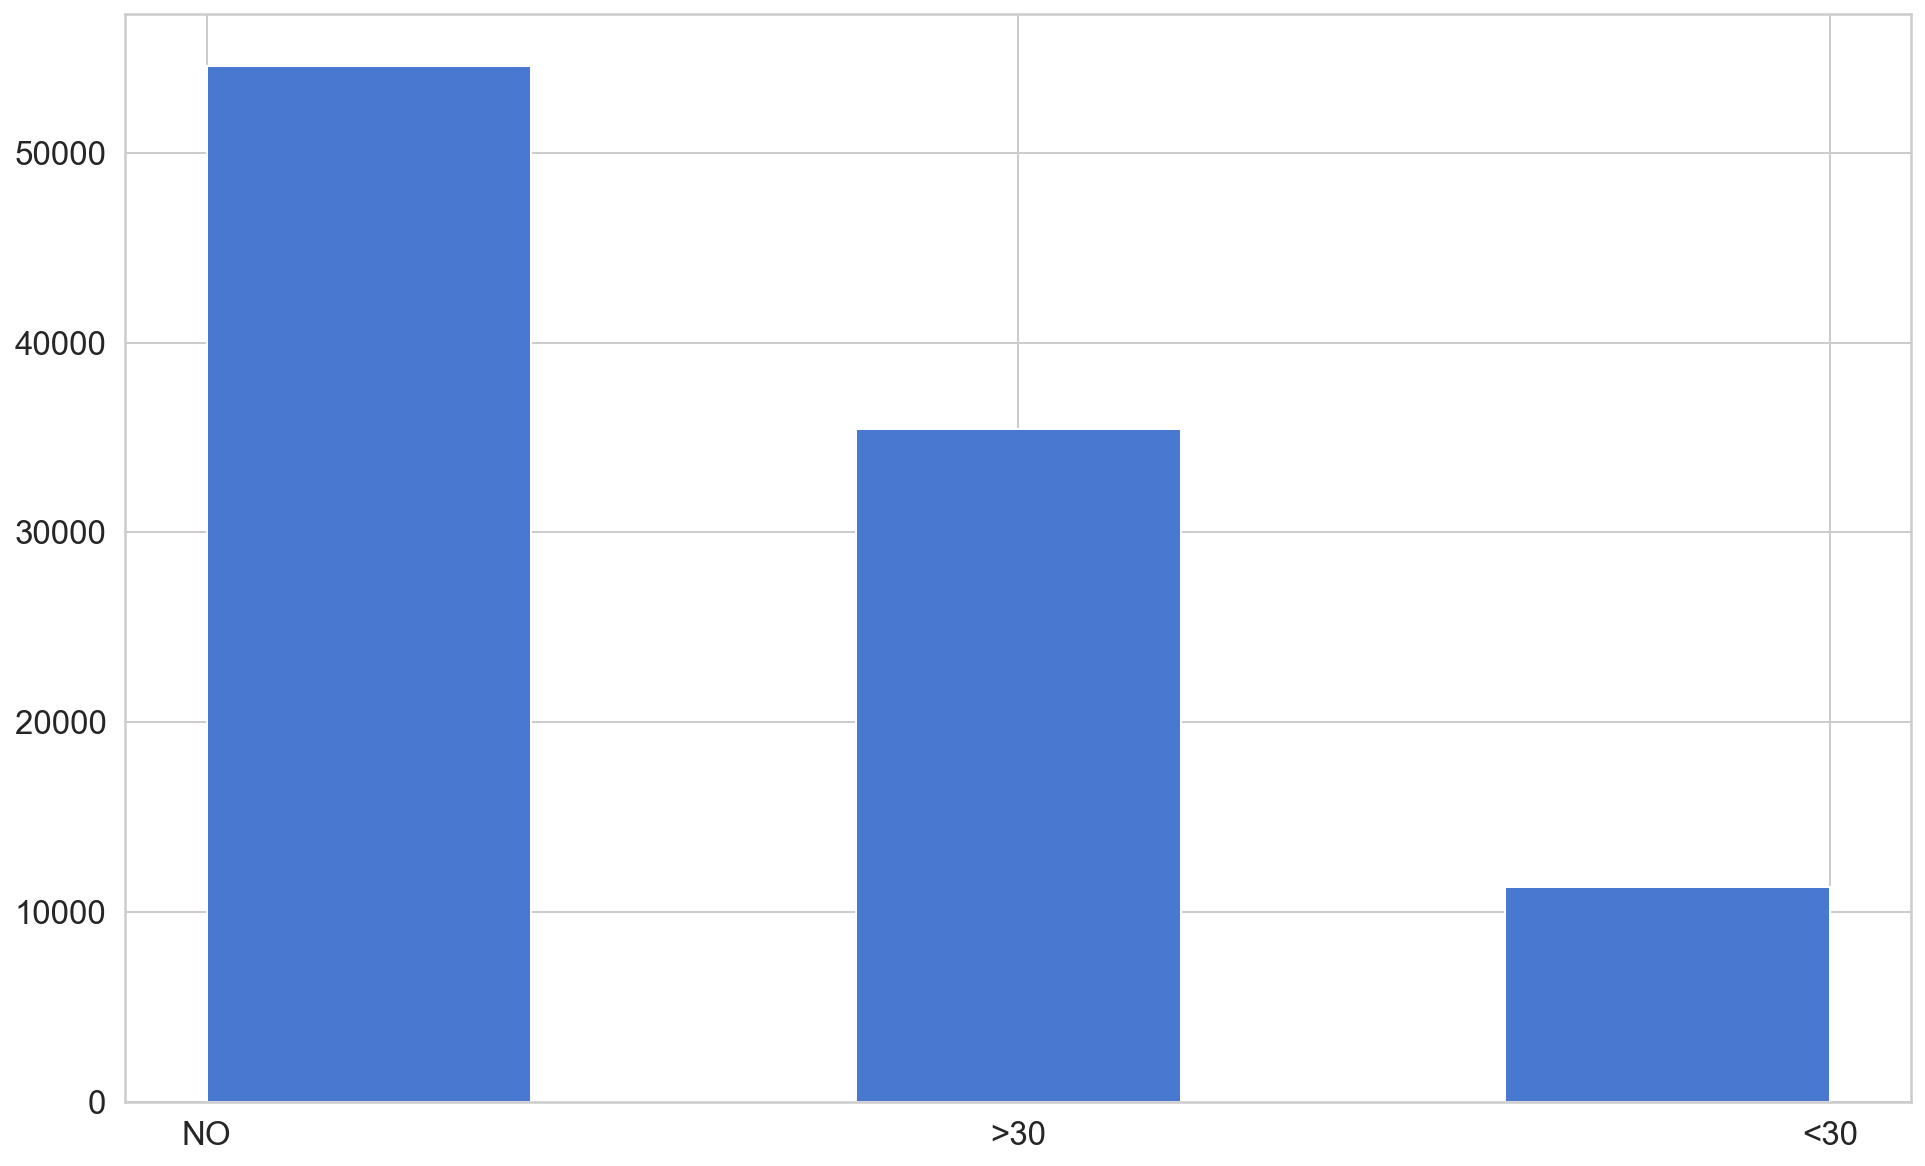

In [10]:
dataset['readmitted'].hist(bins=5)

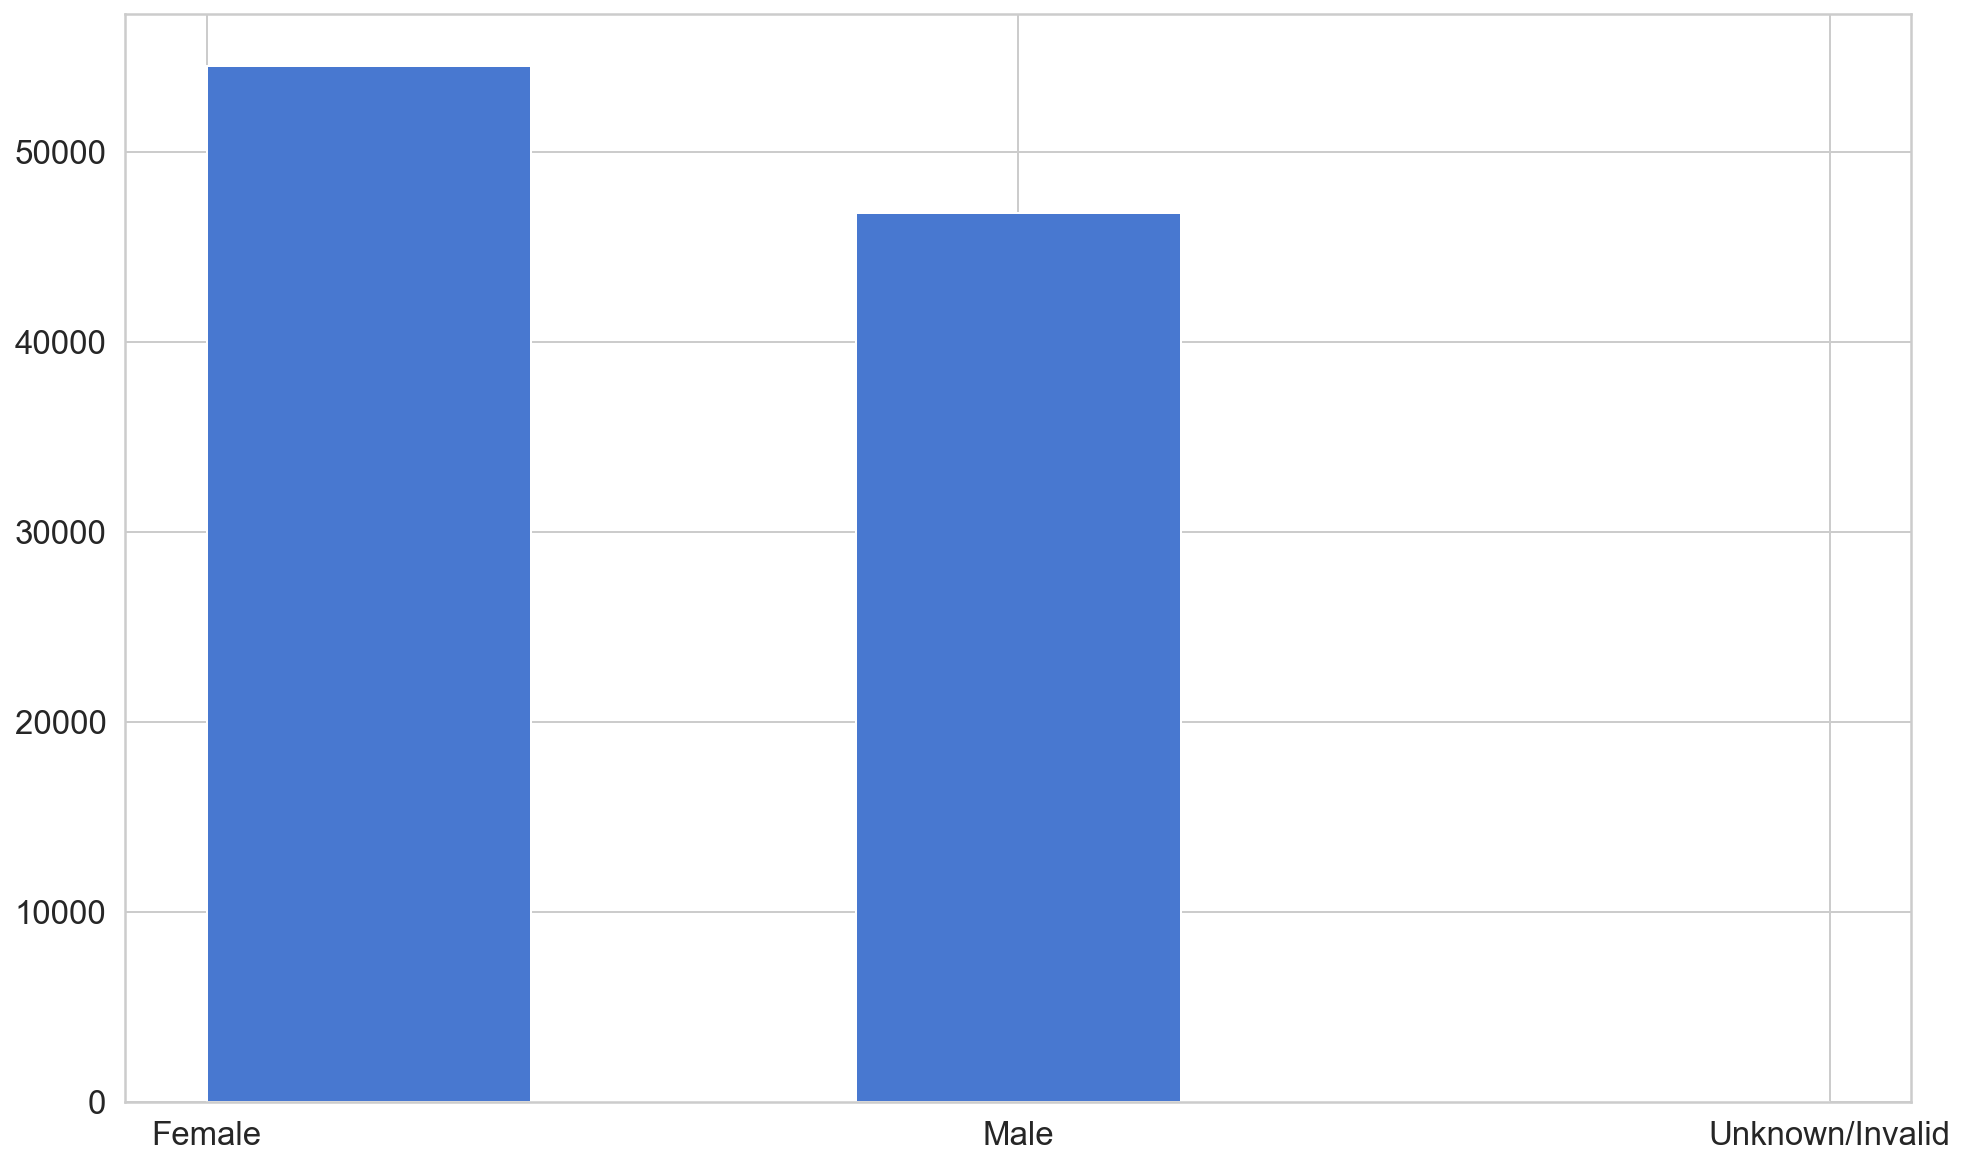

In [11]:
dataset['gender'].hist(bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe30f0556d0>,
      dtype=object)

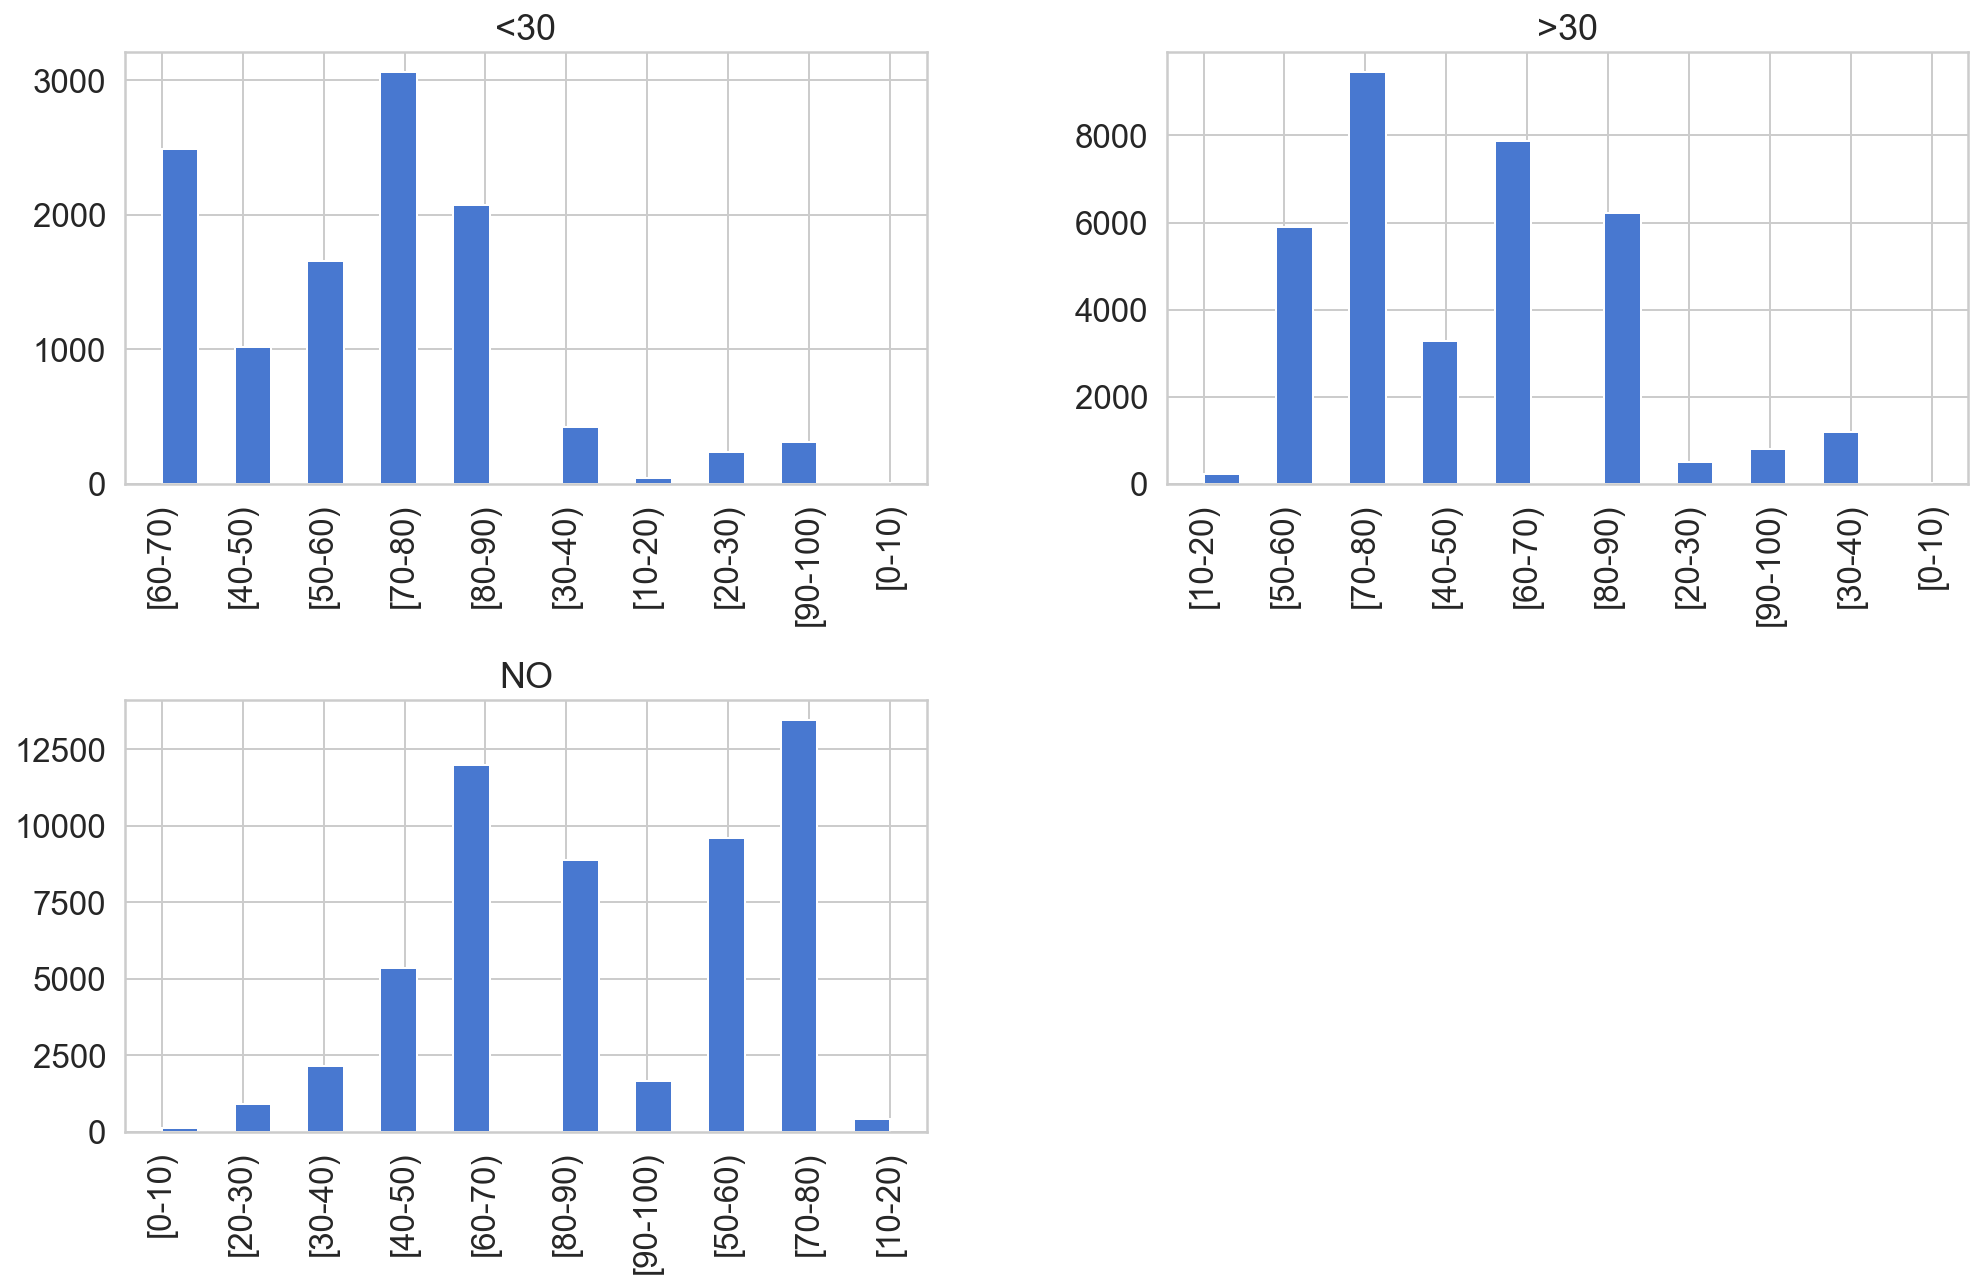

In [12]:
dataset.hist(column = 'age', by = 'readmitted', bins=20)

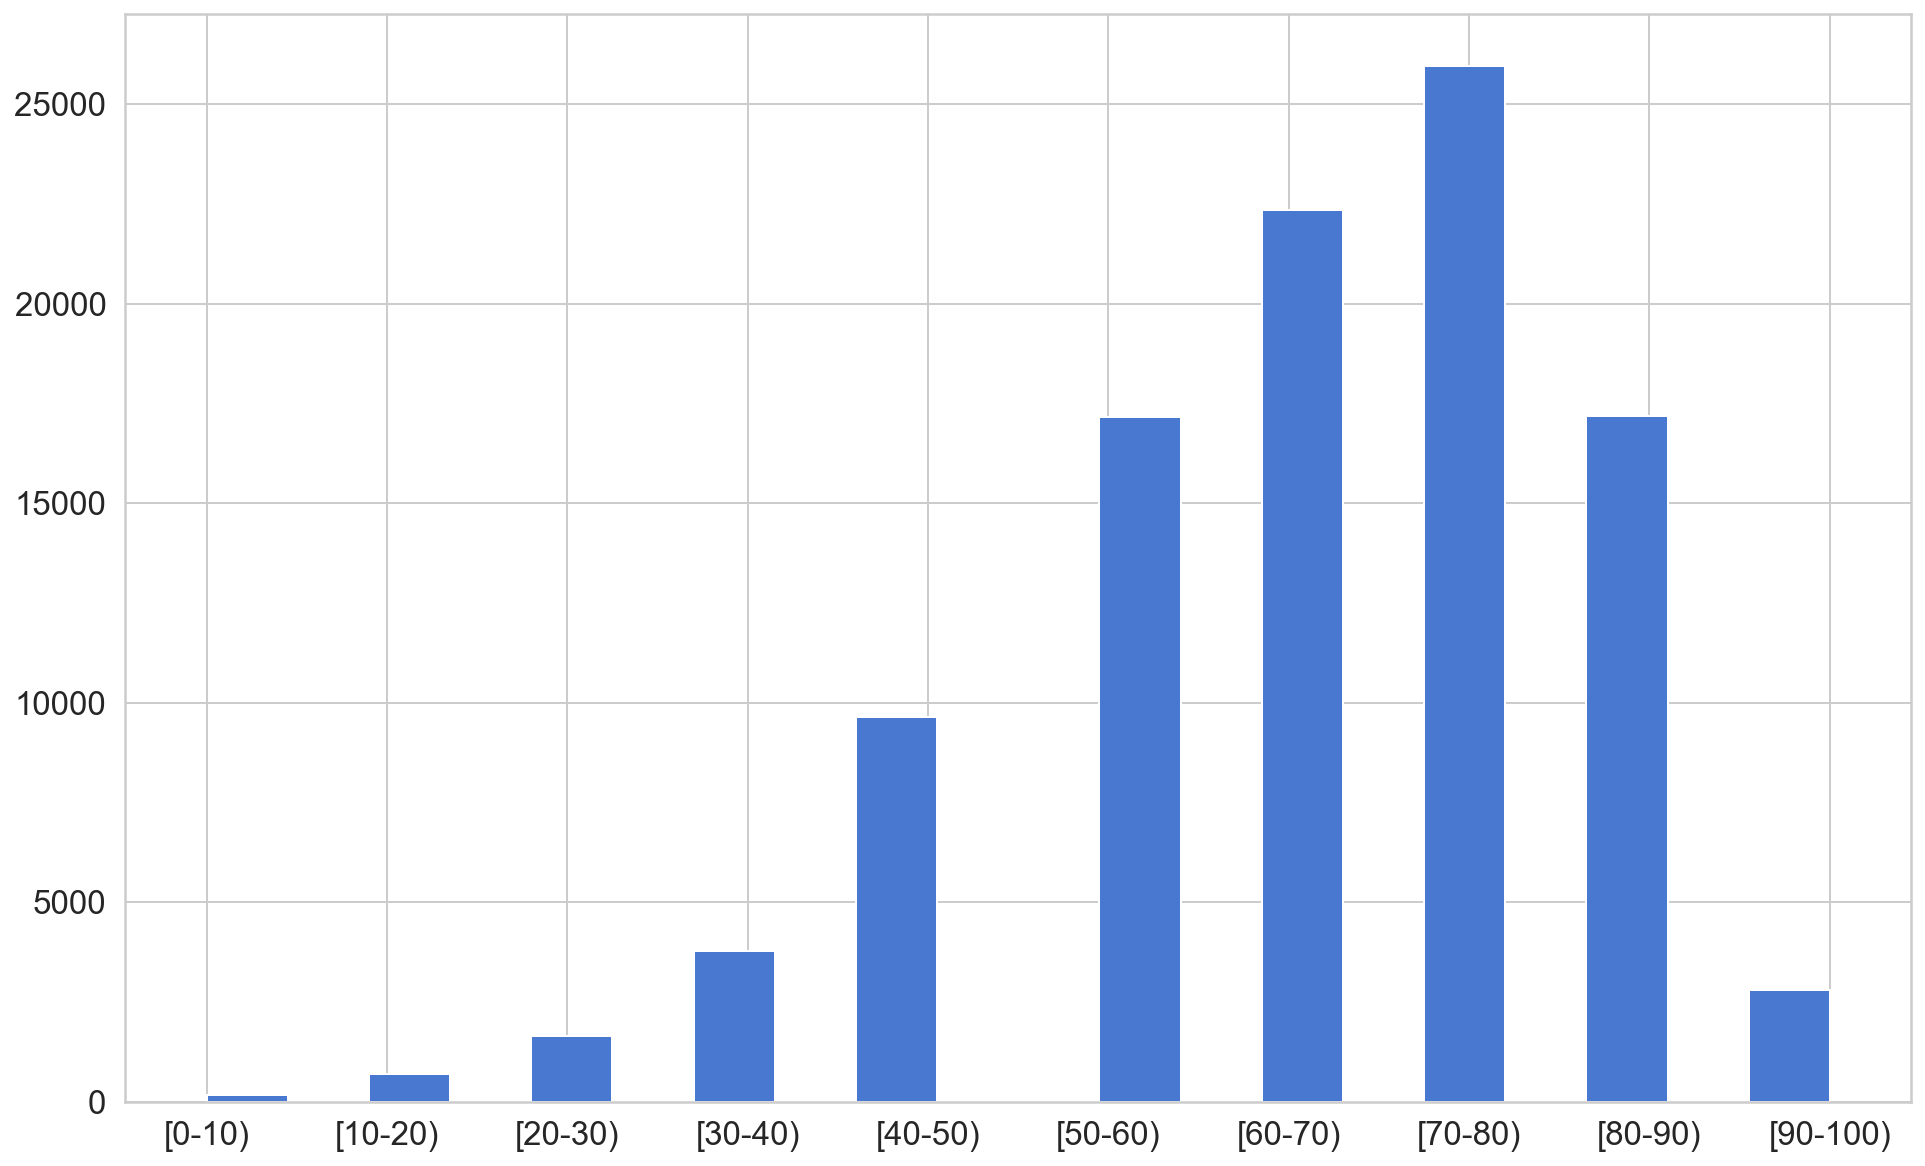

In [13]:
dataset['age'].hist(bins=20)

In [14]:

lb1 = LabelEncoder()
dataset['gender']=lb1.fit_transform(dataset['gender'])

lb2 = LabelEncoder()
dataset['age']=lb2.fit_transform(dataset['age'])

lb3 = LabelEncoder()
dataset['metformin']=lb3.fit_transform(dataset['metformin'])

lb4 = LabelEncoder()
dataset['glimepiride']=lb4.fit_transform(dataset['glimepiride'])

lb5 = LabelEncoder()
dataset['glipizide']=lb5.fit_transform(dataset['glipizide'])

lb6 = LabelEncoder()
dataset['glyburide']=lb6.fit_transform(dataset['glyburide'])

lb7 = LabelEncoder()
dataset['rosiglitazone']=lb7.fit_transform(dataset['rosiglitazone'])

lb8 = LabelEncoder()
dataset['insulin']=lb8.fit_transform(dataset['insulin'])

lb9 = LabelEncoder()
dataset['change']=lb9.fit_transform(dataset['change'])

lb10 = LabelEncoder()
dataset['diabetesMed']=lb10.fit_transform(dataset['diabetesMed'])


dataset.replace({"<30": 1, ">30": 0,"NO":0}, inplace=True)
dataset

,gender,age,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,glimepiride,glipizide,glyburide,rosiglitazone,insulin,change,diabetesMed,readmitted
0,0,0,41,0,1,1,1,1,1,1,1,1,1,0,0
1,0,1,59,0,18,9,1,1,1,1,1,3,0,1,0
2,0,2,11,5,13,6,1,1,2,1,1,1,1,1,0
3,1,3,44,1,16,7,1,1,1,1,1,3,0,1,0
4,1,4,51,0,8,5,1,1,2,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,51,0,16,9,2,1,1,1,1,0,0,1,0
101762,0,8,33,3,18,9,1,1,1,1,1,2,1,1,0
101763,1,7,53,0,9,13,2,1,1,1,1,0,0,1,0
101764,0,8,45,2,21,9,1,1,2,1,1,3,0,1,0


In [15]:
dataset.corrwith(dataset['readmitted'], axis=0)

gender               -0.002729
age                   0.017732
num_lab_procedures    0.020084
num_procedures       -0.012459
num_medications       0.040753
number_diagnoses      0.049381
metformin            -0.023967
glimepiride          -0.007111
glipizide             0.000778
glyburide            -0.003964
rosiglitazone        -0.004220
insulin               0.002860
change               -0.019554
diabetesMed           0.027145
readmitted            1.000000
dtype: float64

In [16]:
dataset.describe()

,gender,age,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,glimepiride,glipizide,glyburide,rosiglitazone,insulin,change,diabetesMed,readmitted
count,101336.0000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000
mean,0.4618,6.097527,43.014891,1.323824,15.847616,7.420117,1.195459,1.050268,1.120678,1.101356,1.062505,1.404091,0.539828,0.769164,0.111619
std,0.4986,1.595675,19.656359,1.689743,7.683264,1.934348,0.435186,0.240555,0.363196,0.343403,0.252448,0.836314,0.498414,0.421370,0.314898
min,0.0000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,5.000000,31.000000,0.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,0.0000,6.000000,44.000000,1.000000,15.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.0000,7.000000,57.000000,2.000000,20.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,2.0000,9.000000,132.000000,6.000000,50.000000,16.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [17]:
dataset.corr()

,gender,age,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,glimepiride,glipizide,glyburide,rosiglitazone,insulin,change,diabetesMed,readmitted
gender,1.000000,-0.050395,-0.004239,0.057851,-0.030579,-0.003921,0.001052,-0.001268,0.025538,0.029154,0.009091,0.003141,-0.013594,0.015239,-0.002729
age,-0.050395,1.000000,0.021302,-0.029515,0.047308,0.243171,-0.055958,0.033067,0.045555,0.061849,0.003706,-0.023069,0.035659,-0.022333,0.017732
num_lab_procedures,-0.004239,0.021302,1.000000,0.049249,0.262841,0.151573,-0.042722,-0.001239,0.008107,-0.006368,-0.009214,0.034039,-0.060714,0.031111,0.020084
num_procedures,0.057851,-0.029515,0.049249,1.000000,0.362931,0.071282,-0.037884,0.008289,0.000224,0.003231,0.011842,0.005703,0.003627,-0.011436,-0.012459
num_medications,-0.030579,0.047308,0.262841,0.362931,1.000000,0.270583,0.062206,0.039522,0.044351,0.028688,0.052745,0.073935,-0.242874,0.187198,0.040753
number_diagnoses,-0.003921,0.243171,0.151573,0.071282,0.270583,1.000000,-0.065346,0.010263,-0.007214,-0.024795,-0.007922,0.026472,-0.052070,0.020623,0.049381
metformin,0.001052,-0.055958,-0.042722,-0.037884,0.062206,-0.065346,1.000000,0.040754,0.066726,0.117238,0.084611,0.002824,-0.294377,0.246050,-0.023967
glimepiride,-0.001268,0.033067,-0.001239,0.008289,0.039522,0.010263,0.040754,1.000000,-0.058591,-0.054271,0.036822,0.013222,-0.124356,0.114479,-0.007111
glipizide,0.025538,0.045555,0.008107,0.000224,0.044351,-0.007214,0.066726,-0.058591,1.000000,-0.081296,0.037845,0.001344,-0.168370,0.182025,0.000778
glyburide,0.029154,0.061849,-0.006368,0.003231,0.028688,-0.024795,0.117238,-0.054271,-0.081296,1.000000,0.030736,-0.017470,-0.148902,0.161692,-0.003964


# Perform ANN Classification

In [18]:
x = dataset.iloc[0:,:-1]
y = dataset.iloc[:,-1]

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1)
# summarize
print('Train', xtrain.shape, ytrain.shape)
print('Test', xtest.shape, ytest.shape)

Train (91202, 14) (91202,)
Test (10134, 14) (10134,)


In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [21]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [22]:
xtrain.shape

(91202, 14)

In [23]:
# Input layer

model.add(Dense(input_dim=14,
                kernel_initializer='random_uniform', 
                activation='relu', 
                units=32))

# Hidden layers

model.add(Dense(units=16, 
                kernel_initializer='random_uniform', 
                activation='relu'))

model.add(Dense(units=8, 
                kernel_initializer='random_uniform', 
                activation='relu'))

model.add(Dense(units=4, 
                kernel_initializer='random_uniform', 
                activation='relu'))

# Output layer

model.add(Dense(units=1, 
                kernel_initializer='random_uniform', 
                activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])



In [24]:
model.fit(xtrain, ytrain, epochs=50, batch_size=256)

Epoch 1/50
357/357 [==============================] - 0s 674us/step - loss: 0.1353 - accuracy: 0.8875
Epoch 2/50
357/357 [==============================] - 0s 651us/step - loss: 0.0988 - accuracy: 0.8884
Epoch 3/50
357/357 [==============================] - 0s 649us/step - loss: 0.0987 - accuracy: 0.8884
Epoch 4/50
357/357 [==============================] - 0s 654us/step - loss: 0.0986 - accuracy: 0.8884
Epoch 5/50
357/357 [==============================] - 0s 652us/step - loss: 0.0985 - accuracy: 0.8884
Epoch 6/50
357/357 [==============================] - 0s 653us/step - loss: 0.0985 - accuracy: 0.8884
Epoch 7/50
357/357 [==============================] - 0s 659us/step - loss: 0.0985 - accuracy: 0.8884
Epoch 8/50
357/357 [==============================] - 0s 661us/step - loss: 0.0985 - accuracy: 0.8884
Epoch 9/50
357/357 [==============================] - 0s 652us/step - loss: 0.0985 - accuracy: 0.8884
Epoch 10/50
357/357 [==============================] - 0s 729us/step - loss: 0.098

In [25]:
ypred = model.predict(xtest)
ypred = (ypred>0.5)
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[9003    0]
 [1131    0]]


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy:\n', accuracy_score(ytest, ypred))

Accuracy:
 0.8883955002960332


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

ytrainpredict = model.predict(xtrain)
rmsetrain = (np.sqrt(mean_squared_error(ytrain, ytrainpredict)))
r2train = r2_score(ytrain, ytrainpredict)

print('Model Performance of training set:\n')
print('RMSE is {}'.format(rmsetrain))
print('R2 score is {}'.format(r2train))

Model Performance of training set:

RMSE is 0.3133440236299647
R2 score is 0.00985039442376845


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtcclf = DecisionTreeClassifier()
dtcclf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
dtcytest = dtcclf.predict(xtest)
dtcytest

array([0, 0, 1, ..., 0, 1, 0])

In [32]:
dtcytrain = dtcclf.predict(xtrain)
dtcytrain

array([0, 1, 1, ..., 0, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix

print('Decision Tree Classifier:\n=======================\n')
print('----- Confusion Matrix:\n')
dtccmtrain = confusion_matrix(ytrain, dtcytrain)
print('Train:\n', dtccmtrain)
dtccmtest = confusion_matrix(ytest, dtcytest)
print('Test:\n', dtccmtest)

from sklearn.metrics import accuracy_score

print('\n----- Accuracy:\n')
dtcacctrain = accuracy_score(ytrain, dtcytrain)
print('Train: ', dtcacctrain)
dtcacctest = accuracy_score(ytest, dtcytest)
print('Test: ', dtcacctest)

from sklearn.metrics import precision_score

print('\n----- Precision:\n')
dtcrectrain = precision_score(ytrain, dtcytrain, average='weighted')
print('Train: ', dtcrectrain)
dtcprectest = precision_score(ytest, dtcytest, average='weighted')
print('Test: ', dtcprectest)

Decision Tree Classifier:

----- Confusion Matrix:

Train:
 [[81019     3]
 [  509  9671]]
Test:
 [[7823 1180]
 [ 976  155]]

----- Accuracy:

Train:  0.9943860880243854
Test:  0.7872508387606079

----- Precision:

Train:  0.9944190058442289
Test:  0.8028109908061513


# Deployment

In [34]:
model.save("hospital_model.h5")

In [ ]:
import joblib
import pandas as pd
from flask import Flask, jsonify, request
from tensorflow import keras

app = Flask(__name__)
model = keras.models.load_model("/Users/obadaessa/Desktop/Internship/Data Sets/hospital_model.h5")

@app.route("/", methods=["POST"])
def index():
    d = request.json
    df = pd.DataFrame(d, index=[0])
    prediction = model.predict(transform(df))
    predicted_result = prediction.flatten()[0]
    return jsonify({"result": str(predicted_result)})

app.run(host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jul/2020 06:54:47] "GET / HTTP/1.1" 405 -
